In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(42)

# Analysis of Ski Resort Prices based on geographical and resort characteristics

## Abstract

## Introduction
Ski resorts play a pivotal role in winter tourism, drawing millions of visitors annually. A key aspect of their appeal lies in the price of lift tickets, which varies widely across resorts. Accurately predicting these prices can provide valuable insights for consumers and resort operators alike. This paper leverages a range of predictive modeling techniques—including linear regression, k-nearest neighbors (KNN), and tree-based methods—to forecast ski resort lift ticket prices based on geographical features and resort-specific attributes. By comparing the performance of these methods, the study aims to identify the most effective approaches for predicting lift ticket prices, offering practical tools for market analysis and strategic decision-making.

## Exploratory Data Analysis

The data being analyzed is drawn from the kaggle "Ski Resorts" dataset posted by Ulrik Thyge Pedersen. It is available for download at "https://www.kaggle.com/datasets/ulrikthygepedersen/ski-resorts/data".

From kaggle: "Welcome to the Ski Resorts and Snow Coverage dataset! This comprehensive dataset provides information on the locations of ski resorts around the world and the snow coverage they receive throughout the winter season. Whether you're a ski enthusiast looking for the best slopes to hit or a researcher studying climate patterns, this dataset has valuable information that can help you achieve your goals.

The dataset contains detailed information on the latitude and longitude of each ski resort, as well as the elevation, average snowfall, and snow depth measurements for each resort. This information can be used to compare and contrast different ski resorts, analyze weather patterns and trends, and make informed decisions about where to plan your next winter vacation.

In addition to the data on ski resorts and snow coverage, the dataset also includes information on nearby amenities such as restaurants, hotels, and transportation options. This information can help you plan a complete winter vacation, taking into account not only the quality of the skiing but also the availability of other activities and services.

Whether you're a ski enthusiast, a travel planner, or a researcher, the Ski Resorts and Snow Coverage dataset provides a wealth of valuable information that can help you make informed decisions and gain insights into the world of winter sports."

Note: In addition to data on the ski resorts there is an additional data set with detailed information on snowfall for each location. However, for this preliminary analysis we will only be including information about the resorts themselves in the models.

Let's begin by reading the data into a pandas dataframe.

In [2]:
resorts = pd.read_csv('data/resorts.csv',index_col= 'ID', encoding = 'latin-1')

In [3]:
resorts.head()

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,13,...,123,4,4,3,11,16240,Yes,No,No,No
4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,20,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,33,...,150,14,3,1,18,21060,Yes,Yes,Yes,No


In [4]:
resorts.shape

(499, 24)

The data set as 24 features containing information on 499 resorts across the globe.

The features are:

Resort: The name of the resort\
Latitude, Longitude: The coordinates of the resort\
Country, Continent: Country and continent where the resort is located\
Price: The price in Euros for a single day lift ticket\
Season: The months in which the resort typically opens and closes for the season\
Highest point: Altitude above sea level in meters for the highest point of the resort\
Lowest point: Altitude above sea leve in meters for the lowest point of the resort\
Beginner, Intermediate, Difficult slopes: The number of ski runs listed as beginner, intermediate or difficult\
Total slopes: The total number of ski runs\
Longest run: The longest single run in kilometers\
Snow guns: The number of snow guns available for producing on demand snow\
Surface, chair, gondola lifts: The number of lifts of each class operated by the resort\
Total lifts: The total number of lifts operated by the resort\
Lift capacity: The maximum capacity of all lifts per hour\
Child friendly: Is the resort child friendly\
Snow parks: Does the resort feature freestyle parks with jumps and other features\
Night skiing: Does the resort offer nigh skiing\
Summer skiing: Does the resort offer summer skiing


In [5]:
resorts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 1 to 499
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Resort               499 non-null    object 
 1   Latitude             499 non-null    float64
 2   Longitude            499 non-null    float64
 3   Country              499 non-null    object 
 4   Continent            499 non-null    object 
 5   Price                499 non-null    int64  
 6   Season               499 non-null    object 
 7   Highest point        499 non-null    int64  
 8   Lowest point         499 non-null    int64  
 9   Beginner slopes      499 non-null    int64  
 10  Intermediate slopes  499 non-null    int64  
 11  Difficult slopes     499 non-null    int64  
 12  Total slopes         499 non-null    int64  
 13  Longest run          499 non-null    int64  
 14  Snow cannons         499 non-null    int64  
 15  Surface lifts        499 non-null    int64  


In [4]:
resorts.describe()

,Latitude,Longitude,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,43.205684,-6.006784,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,15.975790,59.990459,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,-45.054960,-149.740657,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.672650,1.380975,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,46.347316,8.206372,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,47.327089,12.429237,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,67.784406,176.876668,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


We begin our exploration of the data by calling `.describe()` on our datafram. This

In [6]:
resorts.loc[resorts.Price == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
196,Perisher,-36.396167,148.408582,Australia,Oceania,0,June - October,1605,1125,22,...,271,34,14,1,49,46975,Yes,Yes,Yes,Yes
235,Yellowstone Club,45.668198,-111.067446,United States,North America,0,November - April,3005,2182,30,...,0,4,11,0,15,14886,Yes,No,No,No
335,Pragelato,45.016217,6.942453,Italy,Europe,0,December - April,2700,1335,14,...,0,4,1,0,5,3660,Yes,No,No,No
349,Uludag?-Bursa,40.070529,29.222010,Turkey,Asia,0,Unknown,1767,395,10,...,0,8,6,2,16,19637,Yes,Yes,No,No
369,Palando?ken-Ejder 3200 World Ski Center-,39.543016,42.915247,Turkey,Asia,0,November - April,3176,2200,19,...,0,3,11,2,16,15390,Yes,Yes,Yes,No
387,High1 Resort,37.207294,128.824816,South Korea,Asia,0,December - April,1367,690,4,...,0,1,6,4,11,26685,Yes,No,No,No
390,Alpika Service,43.667196,40.246821,Russia,Europe,0,December - April,2228,535,10,...,0,1,1,7,9,18120,Yes,No,No,No
475,Sun Mountain-Yabuli,44.929398,128.604393,China,Asia,0,November - April,1375,457,3,...,0,4,2,0,6,13776,Yes,No,No,No
495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,9,...,0,11,2,0,13,11865,Yes,No,No,No


In [7]:
resorts = resorts.loc[resorts.Price != 0]

In [12]:
resorts.loc[resorts['Beginner slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
88,Aspen Mountain,39.176099,-106.829206,United States,North America,124,November - April,3418,2422,0,...,0,0,7,1,8,13400,Yes,No,No,No
100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,0,...,0,3,0,1,4,2980,Yes,No,No,No
404,Wendelstein-Brannenburg-?Osterhofen,49.355942,11.144105,Germany,Europe,35,December - March,1723,791,0,...,0,2,0,2,4,3250,Yes,No,No,No
479,Diavolezza-?Lagalb,46.429214,9.977345,Switzerland,Europe,59,"October - November, December - May, June - Oct...",3006,2091,0,...,20,9,2,0,11,3970,Yes,No,No,Yes


In [9]:
resorts.loc[resorts['Intermediate slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,5,...,0,5,1,0,6,5600,No,No,No,Yes
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,3,...,0,1,0,2,3,1460,Yes,No,No,No
205,Oberau (Wildscho?nau),47.423497,12.030743,Austria,Europe,30,December - March,1130,900,1,...,0,2,0,0,2,1932,Yes,No,No,No
427,Indoor ski area Snow Arena-Druskininkai,54.031730,23.960042,Lithuania,Europe,29,Year-round,163,97,1,...,16,4,1,0,5,2800,Yes,Yes,Yes,Yes


In [8]:
resorts.loc[resorts['Difficult slopes'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
10,Rossfeld - Berchtesgaden - Oberau,47.651306,13.058977,Germany,Europe,20,December - April,1554,1300,7,...,0,4,0,0,4,3229,Yes,Yes,Yes,No
23,Howelsen Hill-Steamboat Springs,40.480533,-106.840605,United States,North America,21,November - April,2175,2040,1,...,0,3,1,0,4,2220,No,No,No,No
39,Reither Kogel-Reith im Alpbachtal,47.400542,11.860118,Austria,Europe,46,December - March,1280,670,1,...,0,4,0,1,5,4070,Yes,No,Yes,No
56,Fonna Glacier,60.216882,6.435787,Norway,Europe,42,May - September,1460,1200,2,...,0,1,0,0,1,1200,Yes,Yes,No,Yes
64,Pont d'Espagne - Cauterets,42.851011,-0.139921,France,Europe,35,November - April,1756,1516,3,...,0,2,1,1,4,4150,Yes,No,No,No
65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,3,...,0,1,0,2,3,1460,Yes,No,No,No
77,Balme-?Les Autannes-Vallorcine-?Le Tour,46.285683,4.780410,France,Europe,51,December - April,2270,1453,13,...,0,8,2,2,12,14860,Yes,Yes,No,No
100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,0,...,0,3,0,1,4,2980,Yes,No,No,No


There are 43 resorts that do not possess runs of all three difficulties. The vast majority of these resorts are relatively small with very few total runs so this is not unexpected. The one exception is Aspen, one of the premiere resorts in North America with over 100 total runs. At first glance I assumed this was an error however upon further research I discovered that it does in fact have 0 runs listed as beginner.

In [10]:
resorts.loc[resorts['Longest run'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
6,Voss,60.683706,6.407905,Norway,Europe,43,November - May,960,284,25,...,40,7,4,0,11,11900,Yes,Yes,No,No
7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,5,...,0,5,1,0,6,5600,No,No,No,Yes
9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,4,...,0,3,1,0,4,2880,Yes,No,No,No
16,Treble Cone,-44.632375,168.872825,New Zealand,Oceania,68,June - October,1960,1260,4,...,32,2,2,0,4,4520,No,Yes,No,Yes
19,Les Gets (Les Portes du Soleil),46.155098,6.663331,France,Europe,51,December - April,2466,1000,310,...,1074,89,74,11,174,252280,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Kaiseregg-?Riggisalp-Schwarzsee,46.652497,7.319056,Switzerland,Europe,34,December - March,1750,1050,14,...,46,11,3,1,15,5790,Yes,Yes,Yes,No
490,St. Pierre de Chartreuse-Le Planolet,45.342269,5.814686,France,Europe,21,December - April,1800,900,18,...,35,3,2,0,5,12610,Yes,No,No,No
491,Loon Mountain,44.516452,-74.649625,United States,North America,73,November - April,930,300,15,...,0,2,9,1,12,17034,Yes,Yes,No,No


Upon examining the longest run feature, we see that 205 resorts are reported has having a value of 0. These are resorts who do not have any runs of at least 1 km. It is unclear from the data documentation if the cutoff is exactly 1 km or if shorter runs were rounded up. The overall distribution is strongly bimodal with the remaining resorts having a distribution centered around 5.

array([[<Axes: title={'center': 'Longest run'}>]], dtype=object)

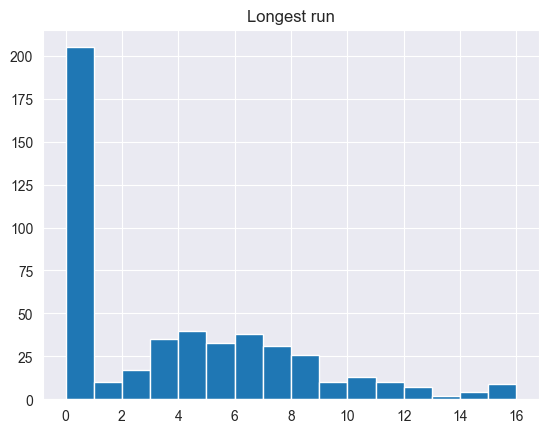

In [26]:
resorts.loc[:, ['Longest run']].hist(bins = 16)

Text(0.5, 1.0, 'Distribution of Total slope when Longest run = 0')

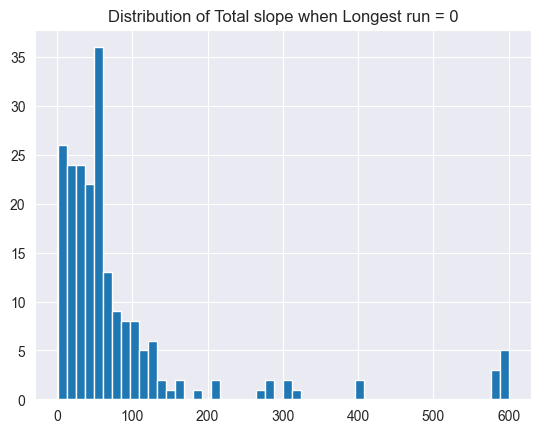

In [25]:

resorts.loc[resorts['Longest run'] == 0, ['Total slopes']].hist(bins = 50)
plt.title('Distribution of Total slope when Longest run = 0')


Text(0.5, 1.0, 'Distribution of Total slope when Longest run != 0')

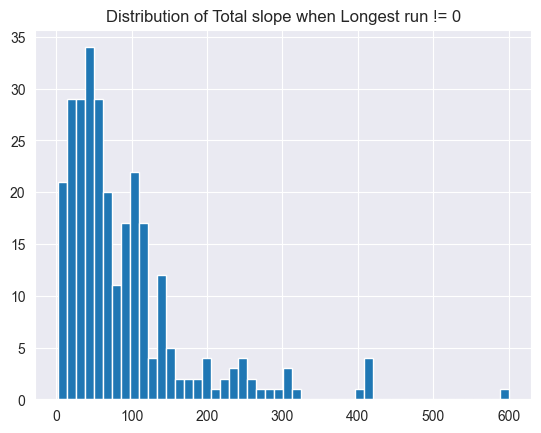

In [27]:
resorts.loc[resorts['Longest run'] != 0, ['Total slopes']].hist(bins = 50)
plt.title('Distribution of Total slope when Longest run != 0')

<Axes: xlabel='Total slopes', ylabel='Longest run'>

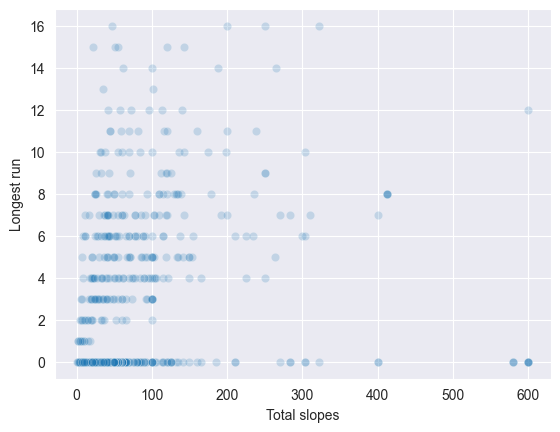

In [15]:
sns.scatterplot(resorts, y = 'Longest run', x = 'Total slopes', alpha = .2)

 My initial assumption was that the resorts with values of 0 represented the smallest mountains with very few total runs. However, upon examining the distributions of Total slopes when longest run is both zero and non zero we see very little difference. There are both many small areas with long runs as well as large areas whose listed value is 0. When viewing the scatter plot of total slopes vs longest run we see a positive correlation between the two variables. There are very few resorts whose longest run is equal to 1 but many small resorts with runs significantly longer than this. Thus we would expect the vast majority of the resorts whose longest run is recorded as 0 to have non-zero values for this feature. This leads me to conclude that the values of 0 do not reflect reality and correspond to missing values. Since such a large proportion of resorts are missing this information we will drop the feature from the data set.


In [28]:
resorts = resorts.drop(['Longest run'], axis = 1)

In [35]:
resorts.loc[resorts['Total lifts'] == 0, :]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
234,Mzaar Kfardebian,33.972129,35.839567,Lebanon,Asia,51,Unknown,2465,1850,46,...,0,0,0,0,0,0,Yes,No,No,No


In [37]:
resorts = resorts.loc[resorts['Total lifts'] != 0]

In [36]:
resorts.loc[resorts['Lift capacity'] == 0]

,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
51,Ben Lomond,-30.023715,151.659179,Australia,Oceania,47,July - September,1572,1460,2,...,0,0,7,0,7,0,Yes,No,No,Yes
234,Mzaar Kfardebian,33.972129,35.839567,Lebanon,Asia,51,Unknown,2465,1850,46,...,0,0,0,0,0,0,Yes,No,No,No
300,Oppdal,62.535178,9.623304,Norway,Europe,44,Unknown,1300,585,40,...,0,1,0,0,1,0,Yes,No,No,No


<Axes: xlabel='Total lifts', ylabel='Lift capacity'>

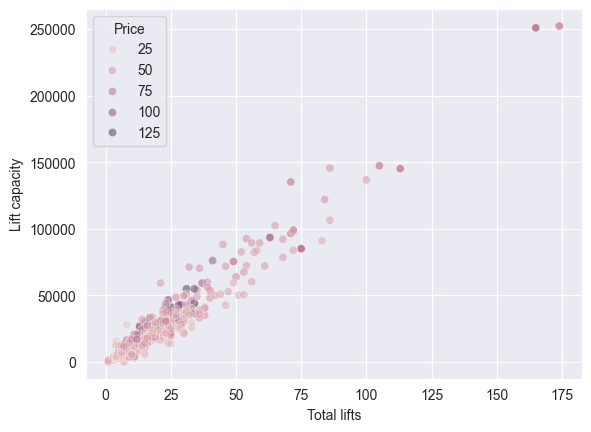

In [16]:
sns.scatterplot(data = resorts, x = 'Total lifts', y = 'Lift capacity', hue = 'Price', alpha = .5)
plt.title()

## Data Cleaning
We will begin cleaning our data by converting the binary features from strings to binary with Yes = 1 and No = 0

In [38]:
yes_true = {'Yes': 1, 'No': 0}
resorts = resorts.replace({'Child friendly': yes_true, 'Snowparks': yes_true, 'Nightskiing': yes_true, 'Summer skiing': yes_true})

C:\Users\theru\AppData\Local\Temp\ipykernel_13892\539778168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resorts = resorts.replace({'Child friendly': yes_true, 'Snowparks': yes_true, 'Nightskiing': yes_true, 'Summer skiing': yes_true})


In [39]:
resorts[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']].head()

,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,
1,1,1,1,0
2,1,1,1,0
3,1,0,0,0
4,1,1,1,0
5,1,1,1,0


Next we will add 2 derived features Elevation and Average_lift_capacity
Elevation is equal to Highest point - Lowest point
Average_lift_capacity is equal to Lift capacity / Total lifts

In [48]:
resorts['Elevation'] = resorts['Highest point'] - resorts['Lowest point']
resorts['Average_lift_capacity']  = resorts['Lift capacity'] / resorts['Total lifts']


We will create our response dataframe `y` and our prediction dataframe `X`

In [49]:
y = resorts[['Price']]
X = resorts.drop(['Price', 'Resort', 'Season'], axis = 1)

In [60]:
geo = ['Continent', 'Country']
mtn = ['Highest point', 'Lowest point', 'Elevation']
slopes = ['Beginner slopes', 'Intermediate slopes', 'Difficult slopes', 'Total slopes']
lifts = ['Surface lifts', 'Chair lifts', 'Gondola lifts', 'Total lifts', 'Lift capacity', 'Average_lift_capacity']
amenities = ['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']

<Axes: >

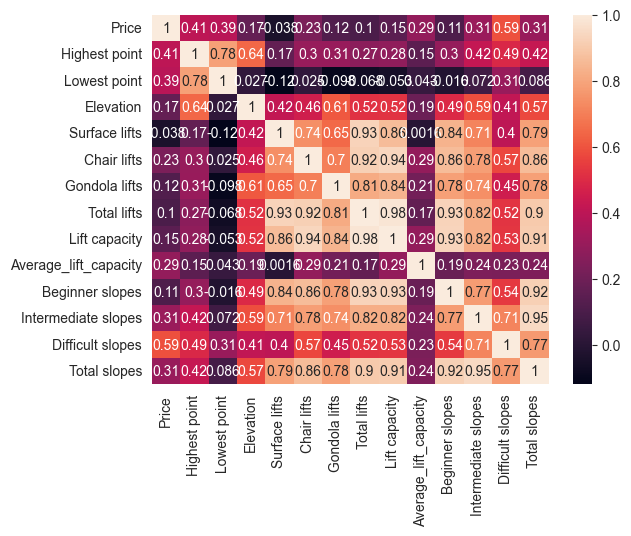

In [61]:
X[mtn + lifts + slopes].corr()
sns.heatmap(y.join(X[mtn + lifts + slopes]).corr(), annot=True)

Examining the correlation map of our non-numeric predictors we see that price is most strongly correlated with `Difficult slopes`, `Highest point`, `Lowest point`, `Total slopes` and `Average lift capacity`. We also see strong correlation between many of our predictors. We will want to build our models carefully to avoid multicolinearity.

In [62]:
X = X.drop(['Latitude', 'Longitude'], axis = 1)

We will drop the long and lat features as this information is will be better encoded through the Country and Continent features

In [63]:
cat = ['Country', 'Continent'] + amenities
X_cat = X[cat]
X_num = X.drop(cat, axis = 1)

We split X into categorical and numeric dataframes for further processing

In [64]:
X_cat

,Country,Continent,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,
1,Norway,Europe,1,1,1,0
2,Norway,Europe,1,1,1,0
3,Austria,Europe,1,0,0,0
4,Canada,North America,1,1,1,0
5,Norway,Europe,1,1,1,0
...,...,...,...,...,...,...
494,Switzerland,Europe,1,0,0,0
496,Germany,Europe,1,1,1,0
497,Austria,Europe,1,1,0,0


array([[<Axes: title={'center': 'Highest point'}>,
        <Axes: title={'center': 'Lowest point'}>,
        <Axes: title={'center': 'Beginner slopes'}>,
        <Axes: title={'center': 'Intermediate slopes'}>],
       [<Axes: title={'center': 'Difficult slopes'}>,
        <Axes: title={'center': 'Total slopes'}>,
        <Axes: title={'center': 'Snow cannons'}>,
        <Axes: title={'center': 'Surface lifts'}>],
       [<Axes: title={'center': 'Chair lifts'}>,
        <Axes: title={'center': 'Gondola lifts'}>,
        <Axes: title={'center': 'Total lifts'}>,
        <Axes: title={'center': 'Lift capacity'}>],
       [<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Average_lift_capacity'}>, <Axes: >,
        <Axes: >]], dtype=object)

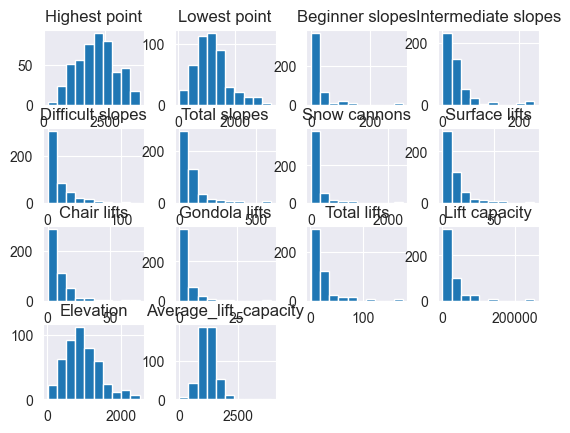

In [65]:
X_num.hist()

Most of our features are not normally distributed. We will apply a power transform to them to normalize and center them.

In [66]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_num_transformed = pd.DataFrame(pt.fit_transform(X_num), columns = pt.get_feature_names_out(), index = X_num.index)
X_num_transformed

,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Elevation,Average_lift_capacity
ID,,,,,,,,,,,,,,
1,-0.902497,-1.000960,0.450371,-0.774095,-0.560715,-0.252726,1.123081,0.744224,-0.039096,-1.175494,0.323057,0.091779,-0.158123,-0.299432
2,-1.275513,-0.606910,0.007813,-0.621915,-0.560715,-0.474842,0.749388,0.929012,-0.039096,-1.175494,0.482507,-0.362323,-1.282723,-1.736636
3,-0.035335,-0.931568,-0.290246,-0.621915,-1.322565,-0.721635,0.816952,-0.521301,-0.434944,0.650006,-0.483464,-0.239737,1.032839,0.658908
4,-0.080224,0.105280,0.105117,0.713699,1.485309,0.781704,-1.043872,-1.085328,-0.219639,-0.132132,-0.897216,-0.747418,-0.031219,-0.147185
5,-1.483568,-2.283148,0.570967,-1.057890,-0.560715,-0.230684,0.880960,0.674682,-0.701092,-0.132132,0.135752,0.008578,-0.147404,-0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.908674,0.776890,-0.620679,0.239568,-0.988504,-0.275232,-1.043872,0.235971,-0.219639,-0.132132,-0.090011,-0.386067,0.656464,-0.751085
496,-1.038360,-0.256114,-0.973290,-1.057890,-0.988504,-1.203248,-0.120944,0.235971,-1.546651,-1.175494,-0.606418,-1.119577,-1.306694,-1.761501
497,-0.794774,-0.219250,-0.159701,-1.307317,-0.748543,-0.831892,0.374874,-0.152547,-0.434944,-1.175494,-0.606418,-1.178949,-0.861555,-1.900615


array([[<Axes: title={'center': 'Highest point'}>,
        <Axes: title={'center': 'Lowest point'}>,
        <Axes: title={'center': 'Beginner slopes'}>,
        <Axes: title={'center': 'Intermediate slopes'}>],
       [<Axes: title={'center': 'Difficult slopes'}>,
        <Axes: title={'center': 'Total slopes'}>,
        <Axes: title={'center': 'Snow cannons'}>,
        <Axes: title={'center': 'Surface lifts'}>],
       [<Axes: title={'center': 'Chair lifts'}>,
        <Axes: title={'center': 'Gondola lifts'}>,
        <Axes: title={'center': 'Total lifts'}>,
        <Axes: title={'center': 'Lift capacity'}>],
       [<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Average_lift_capacity'}>, <Axes: >,
        <Axes: >]], dtype=object)

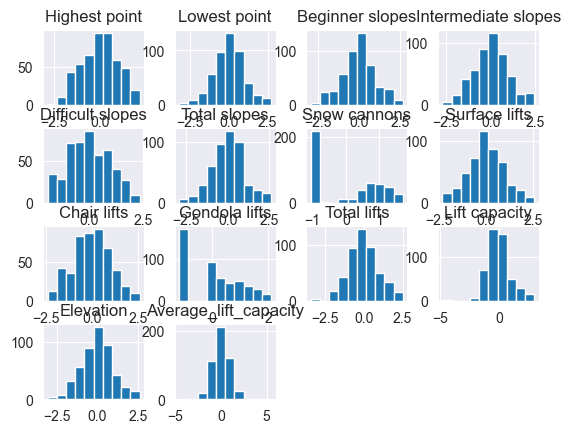

In [76]:
X_num_transformed.hist()

Our features are now normalized with mean = 0 and sd = 1. Snow cannons and gondolas still have non-normal distributions however.

In [77]:
from sklearn.preprocessing import OneHotEncoder

We will use OneHotEncoder to transform our categorical data into a form our models can use.

In [78]:
OHE = OneHotEncoder(sparse_output=False, drop = 'first')
X_cat_encoded = OHE.fit_transform(X_cat[['Country', 'Continent']])
X_cat_encoded = pd.DataFrame(X_cat_encoded, columns = OHE.get_feature_names_out(), index = X_cat.index).join(X_cat.drop(['Country', 'Continent'], axis = 1))
X_cat_encoded

,Country_Argentina,Country_Australia,Country_Austria,Country_Bosnia and Herzegovina,Country_Bulgaria,Country_Canada,Country_Chile,Country_Czech Republic,Country_Finland,Country_France,...,Country_United Kingdom,Country_United States,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0


Now we join our categorical and numerical dataframes to create our predictors dataframe

In [79]:
preds = X_num_transformed.join(X_cat_encoded)
preds

,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,...,Country_United Kingdom,Country_United States,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Child friendly,Snowparks,Nightskiing,Summer skiing
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.902497,-1.000960,0.450371,-0.774095,-0.560715,-0.252726,1.123081,0.744224,-0.039096,-1.175494,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
2,-1.275513,-0.606910,0.007813,-0.621915,-0.560715,-0.474842,0.749388,0.929012,-0.039096,-1.175494,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
3,-0.035335,-0.931568,-0.290246,-0.621915,-1.322565,-0.721635,0.816952,-0.521301,-0.434944,0.650006,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
4,-0.080224,0.105280,0.105117,0.713699,1.485309,0.781704,-1.043872,-1.085328,-0.219639,-0.132132,...,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1,0
5,-1.483568,-2.283148,0.570967,-1.057890,-0.560715,-0.230684,0.880960,0.674682,-0.701092,-0.132132,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.908674,0.776890,-0.620679,0.239568,-0.988504,-0.275232,-1.043872,0.235971,-0.219639,-0.132132,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
496,-1.038360,-0.256114,-0.973290,-1.057890,-0.988504,-1.203248,-0.120944,0.235971,-1.546651,-1.175494,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1,0
497,-0.794774,-0.219250,-0.159701,-1.307317,-0.748543,-0.831892,0.374874,-0.152547,-0.434944,-1.175494,...,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0


Finally we will apply a power transform to the price data to normalize and scale it.

Text(0.5, 1.0, 'Transformed Price Histogram')

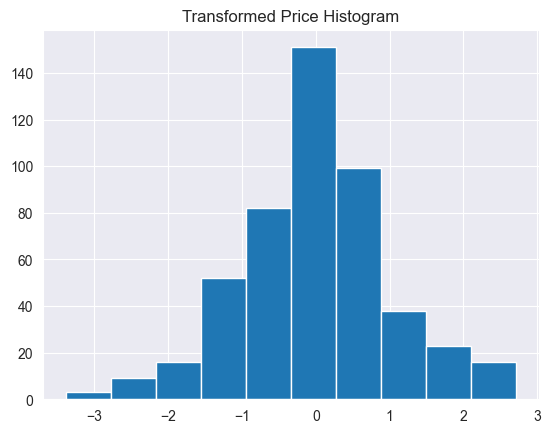

In [80]:
pty = PowerTransformer()
response = pd.DataFrame(pty.fit_transform(y), columns = pty.get_feature_names_out(), index = y.index)
response.hist()
plt.title('Transformed Price Histogram')

## Analysis and Model Training
We will fit Linear Regression, KNN and Tree based methods to the data. We will compare them using the Test R^2 metric.

First we will create our training and test sets using a hold out ratio of .2

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(preds, response, test_size = 0.2, random_state = 42)

We now fit a Linear Regression model using all of the predictors.

In [82]:
lr_full = LinearRegression().fit(X_train, y_train)
lr_full.score(X_test, y_test)

0.7615060883542029

The trained model achieves a test r^2 of .762.
The parameter values are shown below.

In [84]:
pd.DataFrame(lr_full.coef_, columns = preds.columns).melt().sort_values('value', ascending = False)

,variable,value
51,Continent_Oceania,1.303976e+00
41,Country_South Korea,1.155394e+00
50,Continent_North America,1.053251e+00
34,Country_Norway,1.016597e+00
22,Country_Finland,9.971504e-01
53,Child friendly,9.766585e-01
31,Country_Liechtenstein,9.091708e-01
48,Country_United States,8.810135e-01
47,Country_United Kingdom,8.406957e-01
44,Country_Switzerland,8.055285e-01


Next we will use the sklearn Sequential Feature Selector to perform forward stepwise selection and reduce the complexity of our model.

In [85]:
from sklearn.feature_selection import SequentialFeatureSelector

In [86]:
features = {}
scores = {}
for n in range(1,35):
    forward = SequentialFeatureSelector(LinearRegression(), cv=5, direction = 'forward',n_jobs = -1, n_features_to_select=n)
    forward.fit(X_train, y_train)
    features[n] = forward.get_feature_names_out()
    scores[n] = LinearRegression().fit(X_train[features[n]], y_train).score(X_test[features[n]], y_test)
    #print(n, scores[n], features[n])


Text(0.5, 1.0, 'Forward Selection Test R^2 vs. Number of Features')

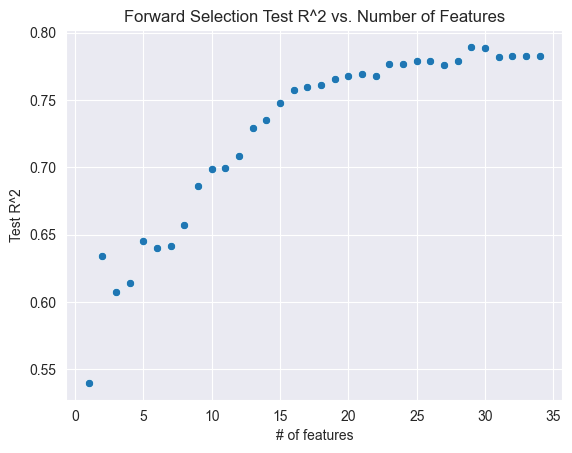

In [87]:
fwd_scores = pd.DataFrame(scores.items(), columns = ['# of features', 'score'])
sns.scatterplot(data=fwd_scores, x = "# of features", y = "score")
plt.ylabel('Test R^2')
plt.title('Forward Selection Test R^2 vs. Number of Features')

Viewing the graph of Test Score vs # of features we see that the model with 29 features achieved the highest R^2 with a score of .789 which is an improvement over the full model.

In [90]:
forward_best = SequentialFeatureSelector(LinearRegression(), cv=5, direction = 'forward',n_jobs = -1, n_features_to_select = 29)
forward_best.fit(X_train, y_train)
forward_features = forward_best.get_feature_names_out()
forward_best_model = LinearRegression().fit(X_train[forward_features], y_train)
forward_best_model.score(X_test[forward_features], y_test)

0.7894110298078124

Text(0.5, 1.0, 'Residuals vs. Actual Price')

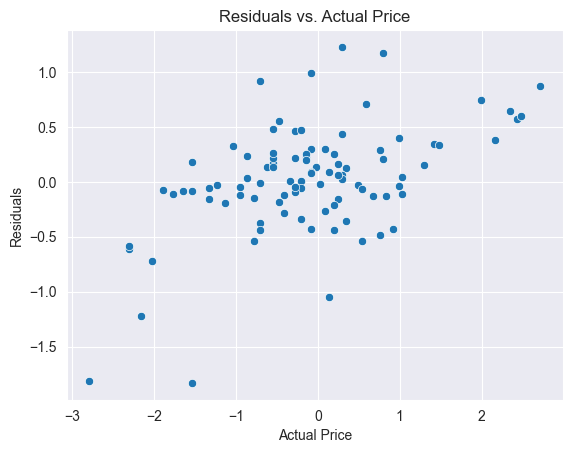

In [93]:
forward_preds = pd.DataFrame(forward_best_model.predict(X_test[forward_features]), columns = ['predictions'], index = X_test.index).join(y_test)
forward_preds = forward_preds.rename(columns = {'Price': 'actual'})
forward_preds['residuals'] = forward_preds['actual'] - forward_preds['predictions']
forward_preds['residuals^2'] = forward_preds['residuals'] ** 2
sns.scatterplot(data = forward_preds, y = 'residuals', x = 'actual')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Price')

The residuals vs price graph shows a weak positive trend indicating that our model does not perform as well for high and low prices.

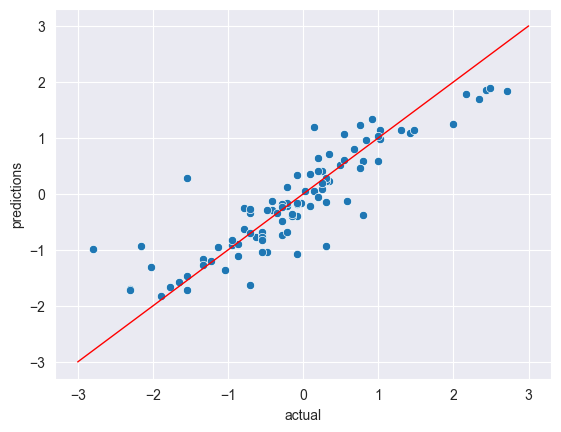

In [94]:
sns.scatterplot(data = forward_preds, y = 'predictions', x = 'actual')
plt.plot([-3,3],[-3,3], linewidth = 1, color = 'red')

It appears that the model tends to overpredict cheaper resorts and underpredict more expensive ones.

In [95]:
forward_coef = pd.DataFrame({'forward_coef': np.reshape(forward_best_model.coef_, (-1,))}, index = X_train[forward_features].columns)
forward_coef.sort_values('forward_coef', ascending = False)

,forward_coef
Country_United States,2.417003
Continent_Oceania,2.260591
Country_South Korea,1.789836
Country_Chile,1.684550
Country_Canada,1.672645
Country_Liechtenstein,1.111166
Country_Norway,1.077950
Country_Switzerland,1.023321
Country_Finland,1.017577
Country_Sweden,0.925989


Next we apply regularization to our model using sklearn Lasso. We perform a grid search over the regularization parameter alpha.

Lasso achieved its highest cross validation score with alpha = .002. It achieved a test r^2 of .757 which is comparable to the full model but slightly worse than the model chosen by forward selection.

In [98]:
from sklearn.linear_model import Lasso
param_grid_lasso = {'alpha': np.logspace(-4,-2,100)}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, n_jobs = -1)
grid_lasso.fit(X_train, np.reshape(y_train, (-1,)))
print(grid_lasso.score(X_test, y_test))
print(grid_lasso.best_params_)
best_lasso = grid_lasso.best_estimator_

0.7572119080449368
{'alpha': np.float64(0.0021544346900318843)}


In [99]:
lasso_coef = pd.DataFrame({'coef_lasso': best_lasso.coef_}, index = X_train.columns)
lasso_coef.sort_values('coef_lasso', ascending = False)

,coef_lasso
Continent_Oceania,1.399255
Continent_North America,0.901457
Country_United States,0.695503
Country_Chile,0.690127
Country_Norway,0.631147
Country_Switzerland,0.627574
Child friendly,0.414347
Summer skiing,0.404133
Country_Finland,0.398902
Total slopes,0.366450


Text(0.5, 1.0, 'Lasso CV Scores vs Regularization')

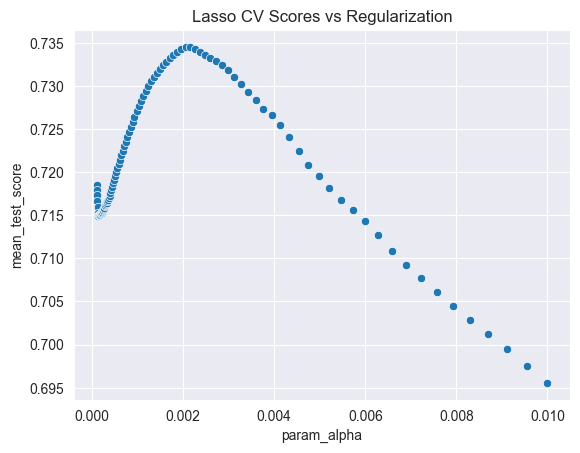

In [100]:
lasso_cv = pd.DataFrame(grid_lasso.cv_results_)
lasso_cv
sns.scatterplot(data = lasso_cv, x = "param_alpha", y = "mean_test_score")
plt.title('Lasso CV Scores vs Regularization')

In [101]:
lasso_coef = pd.DataFrame({'coef_lasso': best_lasso.coef_}, index = X_train.columns)
lasso_coef.sort_values('coef_lasso', ascending = False)


,coef_lasso
Continent_Oceania,1.399255
Continent_North America,0.901457
Country_United States,0.695503
Country_Chile,0.690127
Country_Norway,0.631147
Country_Switzerland,0.627574
Child friendly,0.414347
Summer skiing,0.404133
Country_Finland,0.398902
Total slopes,0.366450


Next we will apply regularization with sklearn Ridge using cross validation to select the regularization parameter alpha.

In [97]:
from sklearn.linear_model import Ridge
param_grid_ridge = {'alpha':np.logspace(-1, .5, 200)}
grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge)
grid_ridge.fit(X_train, np.reshape(y_train, (-1,)))
print(grid_ridge.score(X_test, y_test))
print(grid_ridge.best_params_)
best_ridge = grid_ridge.best_estimator_

0.7679285780130752
{'alpha': np.float64(0.9221978823334327)}


Ridge achieved its best cross validation score with alpha = .922. It's test r^2 was .768 which is an improvement over both the full model and lasso but underperforms compared to forward selection.

In [144]:
ridge_coef = pd.DataFrame({'coef_ridge': best_ridge.coef_}, index = X_train.columns)
ridge_coef.sort_values('coef_ridge', ascending = False)


,coef_ridge
Continent_Oceania,0.944919
Continent_North America,0.813086
Country_United States,0.791910
Country_Norway,0.743484
Country_Switzerland,0.723768
Country_Finland,0.616051
Child friendly,0.609365
Country_South Korea,0.528834
Country_United Kingdom,0.503459
Total slopes,0.503121


Text(0.5, 1.0, 'Ridge CV Scores vs Regularization')

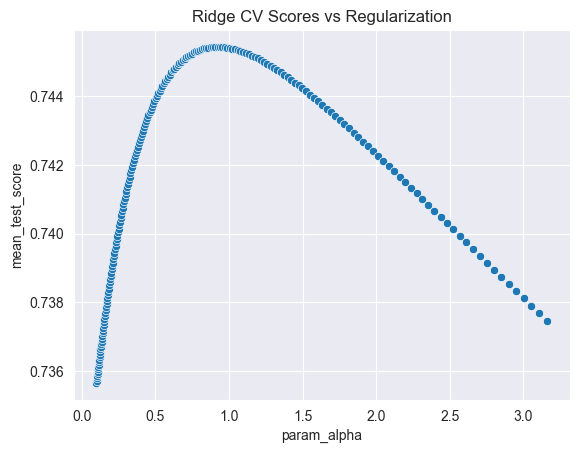

In [148]:
ridge_cv = pd.DataFrame(grid_ridge.cv_results_)
ridge_cv.head()
sns.scatterplot(data=ridge_cv, x = "param_alpha", y = "mean_test_score")
plt.title('Ridge CV Scores vs Regularization')

In [49]:
coef_df = lasso_coef.join(ridge_coef).join(forward_coef).replace(np.nan, 0)
coef_df = coef_df.reset_index().rename(columns = {'index': 'feature', 'coef_lasso': 'lasso', 'coef_ridge': 'ridge','forward_coef':'forward'})
coef_df = coef_df.melt(id_vars = 'feature', var_name = 'method', value_name = 'coef')
coef_df.head()

,feature,method,coef
0,Highest point,lasso,0.043983
1,Lowest point,lasso,0.000000
2,Beginner slopes,lasso,-0.107152
3,Intermediate slopes,lasso,-0.111247
4,Difficult slopes,lasso,-0.005199


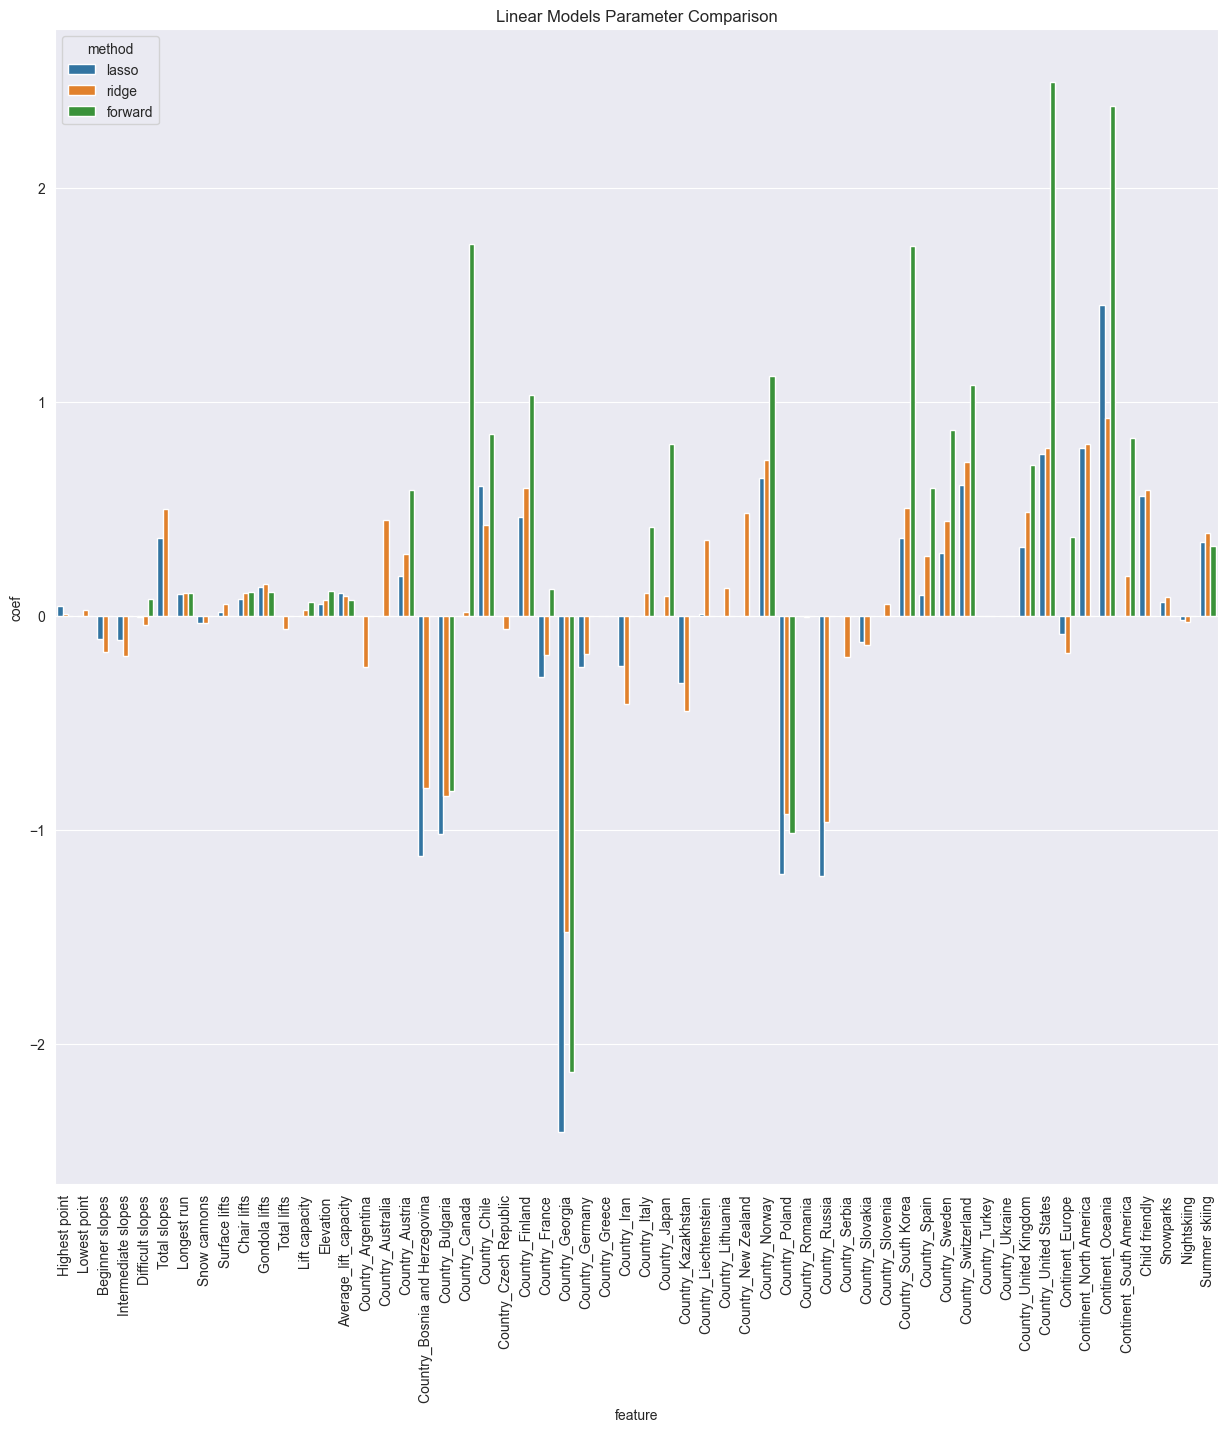

In [142]:
plt.figure(figsize = (15,15))
sns.barplot(data = coef_df, x = 'feature', y = 'coef', hue = 'method')
plt.xticks(rotation = 90, size = 10)
plt.title('Linear Models Parameter Comparison')
plt.show()

When comparing the linear models, the model selected by forward selection had the best test set performance with an r^2 of .789

### Tree Based Models
Next we will fit Decision Tree, Random Forest and ADABoost models to the data.

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid_tree = {'max_depth': range(2,11), 'max_leaf_nodes': range(4,30)}
grid_tree = GridSearchCV(DecisionTreeRegressor(min_samples_leaf=2, random_state=42), param_grid_tree, verbose = 1, n_jobs = -1)
grid_tree.fit(X_train, y_train)
grid_tree.score(X_test, y_test)
print(grid_tree.best_params_)
print(grid_tree.score(X_test, y_test))
best_tree = grid_tree.best_estimator_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
{'max_depth': 6, 'max_leaf_nodes': 28}
0.6657897962822846


A decision tree regressor was fit to the data using cross validation to select the max_depth and max_leaf_nodes parameters. Cross validation selected max_depth = 6 and max_leaf_nodes = 2. This model achieved a test r^2 of .666 which is significantly worse than all of the linear models that were fit.
A visualization of the tree structure can be viewed in the 'tree.pdf' file.

In [119]:
tree_cv = pd.DataFrame(grid_tree.cv_results_)
tree_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003392,0.000453,0.002120,0.000266,2,4,"{'max_depth': 2, 'max_leaf_nodes': 4}",0.30951,0.464448,0.4681,0.475845,0.257579,0.395096,0.092623,201
1,0.003526,0.000286,0.001674,0.000275,2,5,"{'max_depth': 2, 'max_leaf_nodes': 5}",0.30951,0.464448,0.4681,0.475845,0.257579,0.395096,0.092623,201
2,0.002881,0.000181,0.001625,0.000148,2,6,"{'max_depth': 2, 'max_leaf_nodes': 6}",0.30951,0.464448,0.4681,0.475845,0.257579,0.395096,0.092623,201
3,0.004450,0.000798,0.002500,0.000338,2,7,"{'max_depth': 2, 'max_leaf_nodes': 7}",0.30951,0.464448,0.4681,0.475845,0.257579,0.395096,0.092623,201
4,0.003703,0.000768,0.001945,0.000305,2,8,"{'max_depth': 2, 'max_leaf_nodes': 8}",0.30951,0.464448,0.4681,0.475845,0.257579,0.395096,0.092623,201


Text(0.5, 1.0, 'Decision Tree Parameter Grid Search')

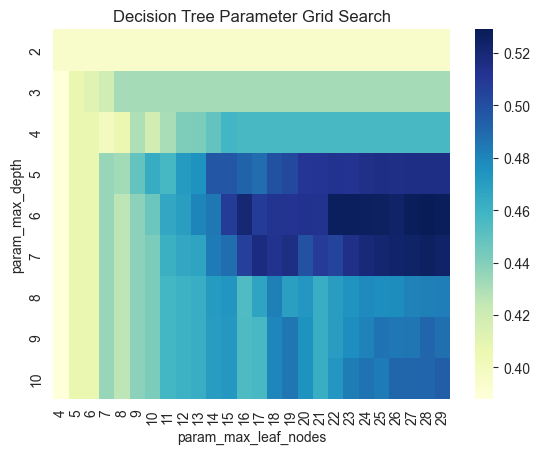

In [120]:
tree_heat = tree_cv[['param_max_leaf_nodes','param_max_depth','mean_test_score']].pivot(index = 'param_max_depth', columns = 'param_max_leaf_nodes', values = 'mean_test_score')
sns.heatmap(tree_heat, cmap = 'YlGnBu')
plt.title('Decision Tree Parameter Grid Search')

In [75]:
import graphviz

from sklearn.tree import export_graphviz

graph = export_graphviz(best_tree, feature_names=X_train.columns)
graphviz.Source(graph).render('tree')

'tree.pdf'

Next a random forest was fit to the data. Cross validation was used to select the max_leaf_nodes of the base trees and the n_estimators used. The best model used 190 max_leaf_nodes with 260 estimators. It achieved a test r^2 of .765 which is comparable to the linear models but slightly worse than the forward selection model.

In [108]:
from sklearn.ensemble import RandomForestRegressor
param_grid_forest = {'max_leaf_nodes': range(50,300,20), 'n_estimators': range(100,300,20)}
grid_forest = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_forest, n_jobs=-1, verbose = 1)
grid_forest.fit(X_train, np.reshape(y_train, (-1,)))

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(50, 300, 20),
                         'n_estimators': range(100, 300, 20)},
             verbose=1)

In [109]:
print(grid_forest.score(X_test, y_test))
print(grid_forest.best_params_)
best_forest = grid_forest.best_estimator_

0.7652024155932542
{'max_leaf_nodes': 190, 'n_estimators': 260}


In [110]:
forest_cv  = pd.DataFrame(grid_forest.cv_results_)
forest_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.532501,0.078410,0.012628,0.000139,50,100,"{'max_leaf_nodes': 50, 'n_estimators': 100}",0.689057,0.685162,0.758957,0.797998,0.644161,0.715067,0.055502,128
1,0.597762,0.080739,0.015380,0.001074,50,120,"{'max_leaf_nodes': 50, 'n_estimators': 120}",0.690719,0.685164,0.760704,0.796764,0.645044,0.715679,0.055037,127
2,0.729508,0.117162,0.017765,0.000719,50,140,"{'max_leaf_nodes': 50, 'n_estimators': 140}",0.694163,0.685017,0.764125,0.797784,0.644635,0.717145,0.055728,117
3,0.850698,0.021956,0.022992,0.007651,50,160,"{'max_leaf_nodes': 50, 'n_estimators': 160}",0.693630,0.684665,0.763136,0.793154,0.639536,0.714824,0.055672,130
4,1.029937,0.108816,0.025095,0.008477,50,180,"{'max_leaf_nodes': 50, 'n_estimators': 180}",0.692368,0.683030,0.763277,0.797509,0.638497,0.714936,0.057490,129


Text(0.5, 1.0, 'Random Forest Parameter Grid Search')

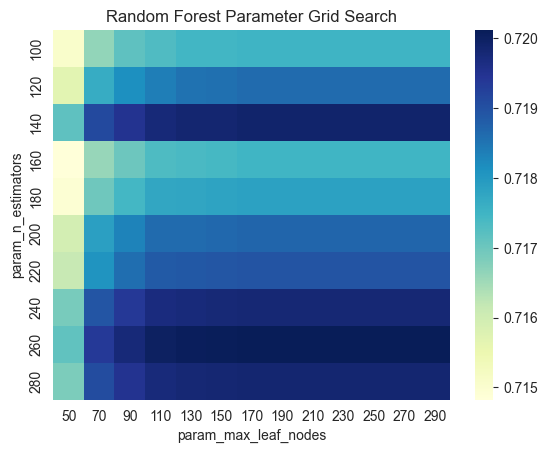

In [111]:
forest_heat = forest_cv[['param_max_leaf_nodes', 'param_n_estimators', 'mean_test_score']].pivot(columns = 'param_max_leaf_nodes', index = 'param_n_estimators', values = 'mean_test_score')
sns.heatmap(forest_heat, cmap = 'YlGnBu')
plt.title('Random Forest Parameter Grid Search')

The final tree based method used was ADABoostRegressor using a decision tree with max_depth=3 as the base estimator. Cross validation was used to select the learning_rate and n_estimators parameters. Cross validation selected a learning rate of 2.69 and 650 estimators. The model achieved a test r^2 of .675 which is significantly worse than that achieved by the RandomForest

In [123]:
from sklearn.ensemble import AdaBoostRegressor
param_grid_ada = {'n_estimators': range(50,1000,50), 'learning_rate': np.round(np.linspace(.1, 3, 20), 2)}
grid_ada = GridSearchCV(AdaBoostRegressor(), param_grid_ada, n_jobs=-1, verbose = 3)
grid_ada.fit(X_train, np.reshape(y_train, (-1,)))
print(grid_ada.best_params_)
grid_ada.score(X_test, y_test)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
{'learning_rate': np.float64(2.69), 'n_estimators': 650}


0.6749743482495725

In [124]:
ada_cv = pd.DataFrame(grid_ada.cv_results_)
ada_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.148254,0.015837,0.011557,0.001238,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.469185,0.589497,0.635684,0.624305,0.516857,0.567106,0.064171,350
1,0.316300,0.041344,0.025378,0.006159,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.493195,0.551779,0.655814,0.620854,0.562951,0.576919,0.056554,323
2,0.451409,0.032516,0.033347,0.005858,0.1,150,"{'learning_rate': 0.1, 'n_estimators': 150}",0.503075,0.547731,0.651264,0.638024,0.574406,0.582900,0.055486,267
3,0.599522,0.031153,0.039325,0.000543,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.530990,0.540127,0.637839,0.629848,0.592432,0.586247,0.044230,226
4,0.733415,0.015357,0.054433,0.005918,0.1,250,"{'learning_rate': 0.1, 'n_estimators': 250}",0.542767,0.539935,0.642138,0.620730,0.579889,0.585092,0.040944,243


Text(0.5, 1.0, 'ADABoost Parameter Grid Search')

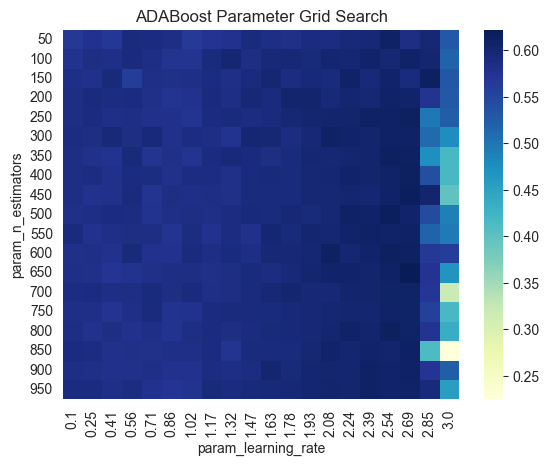

In [125]:
ada_heat = ada_cv[['param_n_estimators', 'param_learning_rate', 'mean_test_score']]
ada_heat = ada_heat.pivot(index = 'param_n_estimators', columns = 'param_learning_rate', values = 'mean_test_score')
sns.heatmap(data = ada_heat, cmap = 'YlGnBu')
plt.title('ADABoost Parameter Grid Search')

### KNN
The last class of model that was fit was a K Nearest Neighbors Regressor. Test set r^2 was used to select the number of neighbors for the final model. The optimal number of neighbors was 5 and the model achieved test r^2 of .724.

In [134]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = range(2,15)
knn_scores = []
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn_scores.append(knn.fit(X_train, np.reshape(y_train, (-1,))).score(X_test, y_test))
knn_scores = pd.DataFrame({'n_neighbors': neighbors, 'Test R^2': knn_scores})
knn_scores

,n_neighbors,Test R^2
0,2,0.687858
1,3,0.721714
2,4,0.720980
3,5,0.724130
4,6,0.714630
5,7,0.701577
6,8,0.695259
7,9,0.698452
8,10,0.701494
9,11,0.698709


Text(0.5, 1.0, 'KNN Test R^2 vs Number of Neighbors')

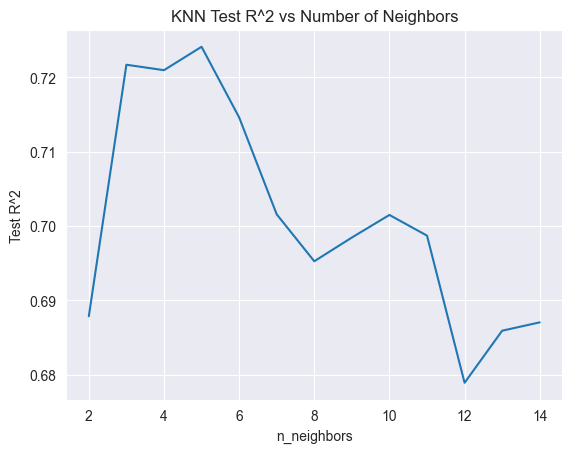

In [135]:
sns.lineplot(data = knn_scores, x = 'n_neighbors', y = 'Test R^2')
plt.title('KNN Test R^2 vs Number of Neighbors')

In [137]:
best_knn = KNeighborsRegressor(n_neighbors = 5)
best_knn.fit(X_train, np.reshape(y_train, (-1,))).score(X_test, y_test)

0.7241298116555198

### Selecting the best model
From the three classes of models trained the best models for each class were as follows:

Linear models: Forward selection with 29 parameter. Test r^2 = .789\
Tree models: Random forest with max_leaf_nodes = 190 and n_estimators = 260. Test r^2 = .765\
KNN: KNN with 5 neighbors. Test r^2 = .724

For this data set the linear regression model chosen by forward selection achieved the best prediction accuracy.